In [14]:
import os
import tensorflow as tf

tces_file = '../mnt/tess/astronet/tces-vetting-v02-tois_as_planets-train.csv'
file_pattern = '../mnt/tess/astronet/tfrecords-vetting-v02-tois_as_planets-train/*'
model_name = 'AstroCNNModelVetting'
config_name = 'base_new'
labels = ['p', 'e', 'n', 'j']
# tces_file = '../mnt/tess/astronet/tces-v14-test.csv'
# file_pattern = '../mnt/tess/astronet/tfrecords-38-test/*'
# model_name = 'AstroCNNModel'
# config_name = 'final_alpha_1'
# labels = ['E', 'N', 'J', 'S', 'B']

filenames = tf.io.gfile.glob(file_pattern)
    
filenames

['../mnt/tess/astronet/tfrecords-vetting-v02-tois_as_planets-train/00004-of-00005',
 '../mnt/tess/astronet/tfrecords-vetting-v02-tois_as_planets-train/00003-of-00005',
 '../mnt/tess/astronet/tfrecords-vetting-v02-tois_as_planets-train/00002-of-00005',
 '../mnt/tess/astronet/tfrecords-vetting-v02-tois_as_planets-train/00001-of-00005',
 '../mnt/tess/astronet/tfrecords-vetting-v02-tois_as_planets-train/00000-of-00005']

In [15]:
import pandas as pd

tce_table = pd.read_csv(tces_file, header=0, low_memory=False)
print(len(tce_table))
tce_table.head(4)

6446


,Astro ID,TIC ID,Final,Decision,Distinct,mk,ch,et,md,as,dm,Tansu,Shishir,Astronet note,"Seed randbetween(1, 100)",Split,RA,Dec,Tmag,Epoc,Per,Dur,Depth,Sectors,SRad,SMass,teff,logg,SN,Qingress,SRadEst,File,comment,disp_e,disp_p,disp_n,disp_b,disp_t,disp_u,disp_j
0,4493,58824746,pt,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.820639,12.788043,10.7434,1770.643550,10.283447,0.154367,925.147554,1-64,0.894563,1.015,5700.0,4.54131,10.819423,0.174703,NaN,astronet_hlsp_qlp_tess_ffi-s0064-0000000058824...,TOI-4638.01 (PC) detected by QLP pipeline,0,1,0,0,1,0,0
1,1494,404774891,et,NaN,1,et,et,et,NaN,et,NaN,NaN,NaN,NaN,39.0,train,278.418348,-53.109595,11.0609,1658.919387,22.503286,0.316050,100754.982500,NaN,1.562760,1.780,7625.0,4.30070,NaN,NaN,1.596057e+00,mk_hlsp_qlp_tess_ffi-s0013-0000000404774891_te...,E labels from triage,1,0,0,0,1,0,0
2,3070,336366871,eb,NaN,1,eb,eb,NaN,NaN,NaN,eb,eb,NaN,NaN,NaN,NaN,214.844836,-62.427077,10.7330,1602.426340,2.459848,0.132126,1981.681134,NaN,NaN,NaN,NaN,NaN,11.741970,0.183820,1.163759e+06,mk_hlsp_qlp_tess_ffi-s0011-0000000336366871_te...,EBs from TOI group vetting,1,0,0,1,0,0,0
3,7483,310002617,pt,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217.926403,83.372661,11.2961,1685.330993,3.177478,0.130247,12937.771680,1-64,1.117480,1.130,6071.0,4.39466,309.278597,0.180650,NaN,astronet_hlsp_qlp_tess_ffi-s0064-0000000310002...,TOI-4087.01 (PC) detected by QLP pipeline,0,1,0,0,1,0,0


In [16]:
series = {}

for filename in filenames:
  tfr = tf.data.TFRecordDataset(filename)
  num_records = 0
  for record in tfr:
    num_records += 1
    ex = tf.train.Example.FromString(record.numpy())
    for k in ex.features.feature.keys():
      f = ex.features.feature[k]
      if f.int64_list.value:
        v = f.int64_list.value[0]
      elif f.float_list.value:
        v = f.float_list.value[0]
      elif f.bytes_list.value:
        v = f.bytes_list.value[0].decode()
      else:
        continue

      if k not in series:
        series[k] = []
      series[k].append(v)
  print(filename, num_records)

2024-08-08 14:50:59.125609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


../mnt/tess/astronet/tfrecords-vetting-v02-tois_as_planets-train/00004-of-00005 1287


2024-08-08 14:50:59.786836: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


../mnt/tess/astronet/tfrecords-vetting-v02-tois_as_planets-train/00003-of-00005 1286


2024-08-08 14:51:00.378263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


../mnt/tess/astronet/tfrecords-vetting-v02-tois_as_planets-train/00002-of-00005 1285


2024-08-08 14:51:00.930123: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


../mnt/tess/astronet/tfrecords-vetting-v02-tois_as_planets-train/00001-of-00005 1287


2024-08-08 14:51:01.536179: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


../mnt/tess/astronet/tfrecords-vetting-v02-tois_as_planets-train/00000-of-00005 1286


In [17]:
import pandas as pd

examples_table = pd.DataFrame.from_dict(series)

pd.set_option('display.max_columns', None)
# examples_table[['secondary_scale']].describe()
examples_table.describe()

,local_view,local_aperture_l,local_scale_present,secondary_std,local_scale_present_0.3,local_std,global_view_double_period,star_mass_present,local_std_even,global_view_half_period_0.3,local_view_half_period_0.3,local_mask,secondary_view_0.3,global_view_double_period_mask_0.3,global_view_double_period_mask,local_aperture_m_0.3,global_view_0.3,astro_id,local_std_odd,local_view_odd,global_view_double_period_std_0.3,disp_p,local_std_odd_0.3,global_view_half_period,star_rad,disp_b,disp_e,global_view_double_period_mask_5.0,secondary_scale_5.0,global_mask_5.0,local_aperture_l_5.0,local_mask_odd,global_view_half_period_std,local_mask_5.0,disp_u,star_rad_est,local_view_half_period_5.0,local_view_half_period_std_5.0,global_view_half_period_5.0,secondary_view_5.0,local_view_odd_5.0,local_std_even_5.0,local_view_even_5.0,local_view_even,global_transit_mask_5.0,global_view_half_period_mask_0.3,secondary_scale_present_0.3,global_transit_mask,local_view_even_0.3,local_aperture_l_0.3,secondary_phase_5.0,global_mask_0.3,global_view_double_period_std,secondary_scale_present_5.0,n_points,secondary_phase_0.3,local_scale_present_5.0,secondary_std_0.3,local_mask_0.3,local_std_even_0.3,secondary_mask_0.3,local_aperture_m_5.0,local_mask_even_0.3,global_std_5.0,local_mask_odd_5.0,global_view,secondary_scale_present,secondary_mask_5.0,local_std_0.3,secondary_mask,Period,sample_segments_view,secondary_std_5.0,local_view_half_period_std,global_view_half_period_std_0.3,local_view_half_period_mask_0.3,local_view_half_period_mask,sample_segments_local_view_5.0,local_view_0.3,n_folds,local_mask_odd_0.3,secondary_phase,star_rad_present,disp_n,global_view_5.0,star_rad_est_present,global_view_double_period_5.0,local_view_half_period_std_0.3,local_mask_even,sample_segments_local_view_0.3,local_scale_0.3,local_scale,local_view_half_period,global_view_double_period_std_5.0,Duration,global_view_half_period_mask,local_view_half_period_mask_5.0,sample_segments_view_0.3,local_aperture_s_5.0,local_std_odd_5.0,Tmag,local_std_5.0,secondary_scale,local_view_5.0,Transit_Depth,global_mask,star_mass,local_aperture_m,sample_segments_view_5.0,global_view_half_period_std_5.0,local_aperture_s,local_aperture_s_0.3,disp_t,global_std_0.3,global_std,sample_segments_local_view,local_view_odd_0.3,global_view_double_period_0.3,global_transit_mask_0.3,local_scale_5.0,secondary_view,global_view_half_period_mask_5.0,disp_j,local_mask_even_5.0,secondary_scale_0.3
count,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6.431000e+03,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.0,6431.000000,6431.000000,6431.0,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.0,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.0,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.0,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.0,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6.431000e+03,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.0,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000
mean,0.043309,0.042992,0.999845,0.465541,0.997357,0.465036,-0.036169,0.717929,0.447

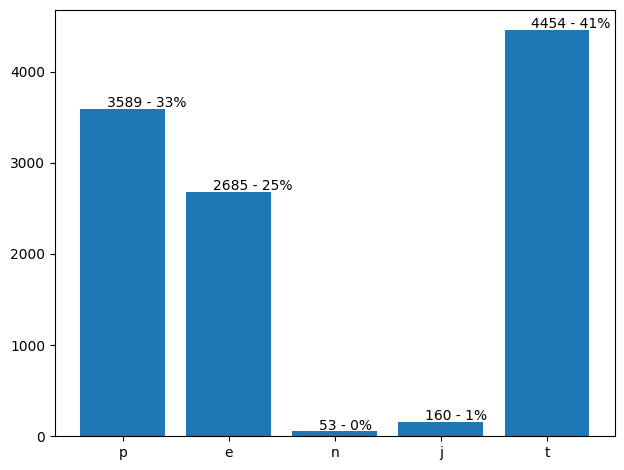

In [18]:
from matplotlib import pyplot as plt

counts = [sum(examples_table['disp_{}'.format(l)] > 0) for l in labels]
ax = plt.bar(labels, counts)
for i in range(len(labels)):
    b = ax[i]
    height = b.get_height()
    x, y = b.get_xy()
    plt.annotate(
        '{} - {:.0%}'.format(counts[i], counts[i] / sum(counts)),
        (x + 0.25, y + height + 20))
plt.tight_layout()


In [19]:
examples_table.head(3)

,local_view,local_aperture_l,local_scale_present,secondary_std,local_scale_present_0.3,local_std,global_view_double_period,star_mass_present,local_std_even,global_view_half_period_0.3,local_view_half_period_0.3,local_mask,secondary_view_0.3,global_view_double_period_mask_0.3,global_view_double_period_mask,local_aperture_m_0.3,global_view_0.3,astro_id,local_std_odd,local_view_odd,global_view_double_period_std_0.3,disp_p,local_std_odd_0.3,global_view_half_period,star_rad,disp_b,disp_e,global_view_double_period_mask_5.0,secondary_scale_5.0,global_mask_5.0,local_aperture_l_5.0,local_mask_odd,global_view_half_period_std,local_mask_5.0,disp_u,star_rad_est,local_view_half_period_5.0,local_view_half_period_std_5.0,global_view_half_period_5.0,secondary_view_5.0,local_view_odd_5.0,local_std_even_5.0,local_view_even_5.0,local_view_even,global_transit_mask_5.0,global_view_half_period_mask_0.3,secondary_scale_present_0.3,global_transit_mask,local_view_even_0.3,local_aperture_l_0.3,secondary_phase_5.0,global_mask_0.3,global_view_double_period_std,secondary_scale_present_5.0,n_points,secondary_phase_0.3,local_scale_present_5.0,secondary_std_0.3,local_mask_0.3,local_std_even_0.3,secondary_mask_0.3,local_aperture_m_5.0,local_mask_even_0.3,global_std_5.0,local_mask_odd_5.0,global_view,secondary_scale_present,secondary_mask_5.0,local_std_0.3,secondary_mask,Period,sample_segments_view,secondary_std_5.0,local_view_half_period_std,global_view_half_period_std_0.3,local_view_half_period_mask_0.3,local_view_half_period_mask,sample_segments_local_view_5.0,local_view_0.3,n_folds,local_mask_odd_0.3,secondary_phase,star_rad_present,disp_n,global_view_5.0,star_rad_est_present,global_view_double_period_5.0,local_view_half_period_std_0.3,local_mask_even,sample_segments_local_view_0.3,local_scale_0.3,local_scale,local_view_half_period,global_view_double_period_std_5.0,Duration,global_view_half_period_mask,local_view_half_period_mask_5.0,sample_segments_view_0.3,local_aperture_s_5.0,local_std_odd_5.0,Tmag,local_std_5.0,secondary_scale,local_view_5.0,Transit_Depth,global_mask,star_mass,local_aperture_m,sample_segments_view_5.0,global_view_half_period_std_5.0,local_aperture_s,local_aperture_s_0.3,disp_t,global_std_0.3,global_std,sample_segments_local_view,local_view_odd_0.3,global_view_double_period_0.3,global_transit_mask_0.3,local_scale_5.0,secondary_view,global_view_half_period_mask_5.0,disp_j,local_mask_even_5.0,secondary_scale_0.3
0,0.000024,0.000024,1.0,0.000856,1.0,0.000892,0.000285,0.0,0.000882,-0.000016,-0.000049,1.0,-0.000032,1.0,1.0,0.000058,0.000065,2420,0.000898,-0.000045,0.000811,0,0.000754,-0.000101,0.00000,0,1,1.0,0.000869,1.0,0.012545,1.0,0.000888,1.0,0,0.000000,-0.000405,0.003465,-0.000189,0.002893,0.012652,0.001611,0.012441,0.000091,0.0,1.0,1.0,0.0,0.000104,0.000062,0.498166,1.0,0.000873,1.0,12009.0,0.482600,1.0,0.000759,1.0,0.000761,1.0,0.012502,1.0,0.001558,1.0,0.000330,1.0,1.0,0.000759,1.0,1.598012,1.000039,0.001602,0.001890,0.000830,1.0,1.0,1.000808,0.000062,368.0,1.0,0.482600,0.0,0,0.013963,0.0,0.014160,0.001760,1.0,0.999979,0.067922,0.067891,-0.000215,0.001542,0.248747,1.0,1.0,1.000040,0.012417,0.001497,7.2950,0.001560,0.000012,0.012545,67272.195312,1.0,0.00,0.000014,1.001014,0.001510,0.000020,0.000052,1,0.000784,0.000900,1.000030,0.000020,0.000014,0.0,0.068223,0.000020,1.0,0,1.0,0.000009
1,-0.407657,-0.414658,1.0,0.030345,1.0,0.129596,-0.391155,1.0,0.127740,0.191766,0.201541,1.0,0.002140,1.0,1.0,-0.206131,-0.240453,2722,0.130587,-0.404338,0.128964,0,0.159517,0.180954,2.27618,0,1,1.0,0.461730,1.0,-0.414658,1.0,0.016984,1.0,0,2.075852,0.173183,0.018414,0.180954,0.060754,-0.404338,0.127740,-0.411803,-0.411803,0.0,1.0,1.0,0.0,-0.214091,-0.211111,0.492719,1.0,0.107179,1.0,868.0,0.461925,1.0,0.070575,1.0,0.149569,1.0,-0.407657,1.0,0.101098,1.0,-0.420157,1.0,1.0,0.155395,1.0,0.711852,0.716308,0.030345,0.018414,0.108733,1.0,1.0,0.867883,-0.206131,63.0,1.0,0.492719,1.0,0,-0.420157,1.0,-0.391155,0.118855,1.0,0.989536,0.833822,0.846700,0.173183,0.

In [10]:
tce_table[tce_table.index == 8209]

,Astro ID,TIC ID,Final,Decision,Distinct,mk,ch,et,md,as,dm,Tansu,Shishir,Astronet note,"Seed randbetween(1, 100)",Split,RA,Dec,Tmag,Epoc,Per,Dur,Depth,Sectors,SRad,SMass,teff,logg,SN,Qingress,SRadEst,File,comment,disp_e,disp_p,disp_n,disp_b,disp_t,disp_u,disp_j


In [11]:
import numpy as np

print('Label mismtaches between TCE and tfrecords:')
np.array(set(tce_table[tce_table[f'disp_{labels[0]}'] > 0]['Astro ID'].values)
    - set(examples_table[examples_table[f'disp_{labels[0]}'] > 0]['astro_id'].values))

Label mismtaches between TCE and tfrecords:


array({6017, 5858, 6211, 9124, 4041, 7658, 6572, 6636, 4627, 7293, 8534, 7381, 4284, 4861, 8319},
      dtype=object)

In [12]:
import tensorflow as tf

from astronet import models
from astronet.astro_cnn_model import input_ds

config = models.get_model_config(model_name, config_name)

ds = input_ds.build_dataset(
      file_pattern=file_pattern,
      input_config=config.inputs,
      batch_size=1,
      include_labels=False,
      shuffle_filenames=False,
      repeat=1,
      include_identifiers=True)
labels_ds = input_ds.build_dataset(
      file_pattern=file_pattern,
      input_config=config.inputs,
      batch_size=1,
      include_labels=True,
      shuffle_filenames=False,
      repeat=1,
      include_identifiers=True)
labels_iter = iter(labels_ds)

label_index = {k.lower(): i for i, k in enumerate(config.inputs.label_columns)}
cols = [f"disp_{l}" for l in labels]  # ["disp_E", "disp_N", "disp_J", "disp_S", "disp_B"]


all_ids = []
bad_labels = []
for d in ds:
  lab = next(labels_iter)
  
  def lam(e):
    if e.dtype == tf.int64:
        return e
    if tf.reduce_any(tf.math.is_nan(e)):
        tf.print(e, summarize=-1)
        raise ValueError('data has NaNs.')
    return e
  ex_id = d[1].numpy().item()
  all_ids.append(ex_id)
  
  assert lab[0]['duration'] == d[0]['duration']
  rec = tce_table[tce_table['Astro ID'] == ex_id]
  for c in cols:
    if (lab[1][0][label_index[c.lower()]].numpy() == 0) != (rec[c].values[0] == 0):
      bad_labels.append(ex_id)
      print('bad example: ', ex_id)
      print(rec)
      print(cols)
      print(lab[1][0])
      break
  if bad_labels:
    break
  
  try:
    tf.nest.map_structure(lam, d)
  except ValueError as e:
    print(e)
    print(d[1])
    break
else:
  print('No NaNs or mismtached labels found.')

if len(all_ids) == len(set(all_ids)):
  print('No duplicates found.')
else:
  print('Found duplicates!', len(all_ids) - len(set(all_ids)))
  print([t for t in set(all_ids) if all_ids.count(t) > 1])

2024-08-08 14:44:26.585783: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5]
	 [[{{node Placeholder/_0}}]]
2024-08-08 14:44:26.939969: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5]
	 [[{{node Placeholder/_0}}]]


KeyError: 'disp_j'

In [ ]:
def astro_id(tic_id):
  return tce_table[tce_table['TIC ID'] == tic_id]['Astro ID'].values[0]

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from astronet.preprocess import preprocess


tess_data_dir = '../mnt/tess/lc'

def find_tce(astro_id):
  with tf.device('cpu'):
    for filename in filenames:
      tfr = tf.data.TFRecordDataset(filename)
      for record in tfr:
        ex = tf.train.Example.FromString(record.numpy())
        if (ex.features.feature["astro_id"].int64_list.value[0] == astro_id):
          print('TIC ID:', tic_id)
          for l in labels:
              print(f'{l}:', ex.features.feature[f"disp_{l}"].int64_list.value[0])
          print('Duration:', ex.features.feature["Duration"].float_list.value[0])
          return ex

    raise ValueError("{} not found in files: {}".format(astro_id, filenames))

In [ ]:
ds = ds.cache()
def plot_ds_tce(ds, astro_id):
    for d in ds:
        if d[1] == astro_id:
            for k, v in d[0].items():
                if k.startswith('local_'):
                    continue
                if k.startswith('global_'):
                    continue
                if k.startswith('secondary_'):
                    continue
                if k.startswith('sample_'):
                    continue
                print(f'{k:25}: {v.numpy()}')
            global_view = np.array(d[0]['global_view'][0].numpy())
            local_view = np.array(d[0]['local_view'][0].numpy())
            secondary_view = np.array(d[0]['secondary_view'][0].numpy())
            fig, axes = plt.subplots(2, 3, figsize=(20, 12))
            axes[0, 0].plot(global_view, '.-')
            axes[0, 1].plot(local_view, '.-')
            axes[0, 2].plot(secondary_view, '.-')
            axes[1, 0].plot(d[0]['global_mask'][0].numpy(), '.-')
            axes[1, 1].plot(d[0]['global_view_0.3'][0].numpy(), '.-')
            axes[1, 2].plot(d[0]['global_view_5.0'][0].numpy(), '.-')
            plt.show()
            plt.close('all')
            return

In [ ]:
ds

In [13]:
tic_id = 314865962
plot_ds_tce(ds, astro_id(tic_id))

NameError: name 'plot_ds_tce' is not defined

In [19]:
tce_table[tce_table['TIC ID'] == tic_id]

,Astro ID,TIC ID,Final,Decision,Distinct,mk,ch,et,md,as,dm,Tansu,Shishir,Astronet note,"Seed randbetween(1, 100)",Split,RA,Dec,Tmag,Epoc,Per,Dur,Depth,Sectors,SRad,SMass,teff,logg,SN,Qingress,SRadEst,File,comment,disp_e,disp_p,disp_n,disp_b,disp_t,disp_u,disp_j
2264,1069,314865962,pt,pt,2,pt,pu,pt,pt,pt,NaN,NaN,NaN,NaN,11.0,val,53.281311,-72.744243,10.3539,1335.941311,22.463614,0.24098,480.616966,NaN,0.978381,0.98,5548.0,4.44828,NaN,NaN,0.970018,mk_hlsp_qlp_tess_ffi-s0033-0000000314865962_te...,E labels from triage,0,1,0,0,1,0,0


In [20]:
astro_id(tic_id)

1069

In [21]:
examples_table[examples_table['astro_id'] == astro_id(tic_id)]

,local_view,local_aperture_l,local_scale_present,secondary_std,local_scale_present_0.3,local_std,global_view_double_period,star_mass_present,local_std_even,global_view_half_period_0.3,local_view_half_period_0.3,local_mask,secondary_view_0.3,global_view_double_period_mask_0.3,global_view_double_period_mask,local_aperture_m_0.3,global_view_0.3,astro_id,local_std_odd,local_view_odd,global_view_double_period_std_0.3,disp_p,local_std_odd_0.3,global_view_half_period,star_rad,disp_b,disp_e,global_view_double_period_mask_5.0,secondary_scale_5.0,global_mask_5.0,local_aperture_l_5.0,local_mask_odd,global_view_half_period_std,local_mask_5.0,disp_u,star_rad_est,local_view_half_period_5.0,local_view_half_period_std_5.0,global_view_half_period_5.0,secondary_view_5.0,local_view_odd_5.0,local_std_even_5.0,local_view_even_5.0,local_view_even,global_transit_mask_5.0,global_view_half_period_mask_0.3,secondary_scale_present_0.3,global_transit_mask,local_view_even_0.3,local_aperture_l_0.3,secondary_phase_5.0,global_mask_0.3,global_view_double_period_std,secondary_scale_present_5.0,n_points,secondary_phase_0.3,local_scale_present_5.0,secondary_std_0.3,local_mask_0.3,local_std_even_0.3,secondary_mask_0.3,local_aperture_m_5.0,local_mask_even_0.3,global_std_5.0,local_mask_odd_5.0,global_view,secondary_scale_present,secondary_mask_5.0,local_std_0.3,secondary_mask,Period,sample_segments_view,secondary_std_5.0,local_view_half_period_std,global_view_half_period_std_0.3,local_view_half_period_mask_0.3,local_view_half_period_mask,sample_segments_local_view_5.0,local_view_0.3,n_folds,local_mask_odd_0.3,secondary_phase,star_rad_present,disp_n,global_view_5.0,star_rad_est_present,global_view_double_period_5.0,local_view_half_period_std_0.3,local_mask_even,sample_segments_local_view_0.3,local_scale_0.3,local_scale,local_view_half_period,global_view_double_period_std_5.0,Duration,global_view_half_period_mask,local_view_half_period_mask_5.0,sample_segments_view_0.3,local_aperture_s_5.0,local_std_odd_5.0,Tmag,local_std_5.0,secondary_scale,local_view_5.0,Transit_Depth,global_mask,star_mass,local_aperture_m,sample_segments_view_5.0,global_view_half_period_std_5.0,local_aperture_s,local_aperture_s_0.3,disp_t,global_std_0.3,global_std,sample_segments_local_view,local_view_odd_0.3,global_view_double_period_0.3,global_transit_mask_0.3,local_scale_5.0,secondary_view,global_view_half_period_mask_5.0,disp_j,local_mask_even_5.0,secondary_scale_0.3
4832,0.11708,0.145571,1.0,0.623956,1.0,0.697678,-0.018083,1.0,0.673137,-0.074104,0.231539,1.0,-0.016642,1.0,1.0,0.140545,0.0,1069,0.71745,0.0738,0.843457,1,0.522347,-0.100192,0.978381,0,0,1.0,0.000203,1.0,0.147605,1.0,1.480818,1.0,0,0.970018,0.168411,1.396614,-0.069715,0.112919,0.196665,0.713158,0.070067,0.167545,0.0,1.0,1.0,0.0,0.275157,0.18598,0.864885,1.0,0.868297,1.0,21607.0,0.819829,1.0,0.510658,1.0,0.551581,1.0,0.138218,1.0,0.709372,1.0,0.096146,1.0,1.0,0.547717,1.0,22.463614,0.999961,0.989926,1.309888,1.385268,1.0,1.0,1.000505,0.140545,32.0,1.0,0.583822,1.0,0,0.029915,1.0,-0.181992,1.134928,1.0,1.000474,0.000912,0.000744,0.102603,0.743763,0.24098,1.0,1.0,1.000014,0.133496,0.769912,10.3539,0.749103,0.000224,0.138218,480.616974,1.0,0.98,0.11708,1.000291,1.426843,0.123759,0.118504,1,0.674287,0.748839,1.000381,0.025102,-0.05435,0.0,0.000725,-0.058025,1.0,0,1.0,0.000207


In [22]:
!ls ../mnt/tess/lc | grep 322117652

mk_hlsp_qlp_tess_ffi-s0011-0000000322117652_tess_v01_llc.fits


In [23]:
tic_id = 314865962
tce = find_tce(astro_id(tic_id))

list(tce.features.feature.keys())

2024-02-10 07:50:15.373246: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2024-02-10 07:50:16.824428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2024-02-10 07:50:17.112221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{n

TIC ID: 314865962
p: 1
e: 0
n: 0
Duration: 0.24098041653633118


2024-02-10 07:50:17.343278: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


['local_view',
 'local_aperture_l',
 'local_scale_present',
 'secondary_std',
 'local_scale_present_0.3',
 'local_std',
 'global_view_double_period',
 'star_mass_present',
 'local_std_even',
 'global_view_half_period_0.3',
 'local_view_half_period_0.3',
 'local_mask',
 'secondary_view_0.3',
 'global_view_double_period_mask_0.3',
 'global_view_double_period_mask',
 'local_aperture_m_0.3',
 'global_view_0.3',
 'astro_id',
 'local_std_odd',
 'local_view_odd',
 'global_view_double_period_std_0.3',
 'disp_p',
 'local_std_odd_0.3',
 'global_view_half_period',
 'star_rad',
 'disp_b',
 'disp_e',
 'global_view_double_period_mask_5.0',
 'secondary_scale_5.0',
 'global_mask_5.0',
 'local_aperture_l_5.0',
 'local_mask_odd',
 'global_view_half_period_std',
 'local_mask_5.0',
 'disp_u',
 'star_rad_est',
 'local_view_half_period_5.0',
 'local_view_half_period_std_5.0',
 'global_view_half_period_5.0',
 'secondary_view_5.0',
 'local_view_odd_5.0',
 'local_std_even_5.0',
 'local_view_even_5.0',
 'local_